## How temprature is effected when the features of the global warming data varies

In [2]:
#Imports
import numpy as np
import pandas as pd

In [57]:
data = pd.read_csv("GlobalWarming.csv")
data.head()
#raw=data

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [4]:
#checking any null values are there.oops there's no null values
data.isnull().sum()


Year        0
Month       0
MEI         0
CO2         0
CH4         0
N2O         0
CFC-11      0
CFC-12      0
TSI         0
Aerosols    0
Temp        0
dtype: int64

In [5]:
#checking the datatypes
data.dtypes

Year          int64
Month         int64
MEI         float64
CO2         float64
CH4         float64
N2O         float64
CFC-11      float64
CFC-12      float64
TSI         float64
Aerosols    float64
Temp        float64
dtype: object

In [6]:
#shape of the dataframe
data.shape

(308, 11)

In [7]:
data.Year.unique()

array([1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008], dtype=int64)

In [9]:
#summary statistics
data.describe()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
count,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000,308.000000
mean,1995.662338,6.551948,0.275555,363.226753,1749.824513,312.391834,251.973068,497.524782,1366.070759,0.016657,0.256776
std,7.423197,3.447214,0.937918,12.647125,46.051678,5.225131,20.231783,57.826899,0.399610,0.029050,0.179090
min,1983.000000,1.000000,-1.635000,340.170000,1629.890000,303.677000,191.324000,350.113000,1365.426100,0.001600,-0.282000
25%,1989.000000,4.000000,-0.398750,353.020000,1722.182500,308.111500,246.295500,472.410750,1365.717050,0.002800,0.121750
50%,1996.000000,7.000000,0.237500,361.735000,1764.040000,311.507000,258.344000,528.356000,1365.980900,0.005750,0.248000
75%,2002.000000,10.000000,0.830500,373.455000,1786.885000,316.979000,267.031000,540.524250,1366.363250,0.012600,0.407250
max,2008.000000,12.000000,3.001000,388.500000,1814.180000,322.182000,271.494000,543.813000,1367.316200,0.149400,0.739000


In [12]:
##corr table
data.corr()

,Year,Month,MEI,CO2,CH4,N2O,CFC-11,CFC-12,TSI,Aerosols,Temp
Year,1.000000,-0.025789,-0.145345,0.985379,0.910563,0.994850,0.460965,0.870067,0.022353,-0.361884,0.755731
Month,-0.025789,1.000000,-0.016345,-0.096287,0.017558,0.012395,-0.014914,-0.001084,-0.032754,0.014845,-0.098016
MEI,-0.145345,-0.016345,1.000000,-0.152911,-0.105555,-0.162375,0.088171,-0.039836,-0.076826,0.352351,0.135292
CO2,0.985379,-0.096287,-0.152911,1.000000,0.872253,0.981135,0.401284,0.823210,0.017867,-0.369265,0.748505
CH4,0.910563,0.017558,-0.105555,0.872253,1.000000,0.894409,0.713504,0.958237,0.146335,-0.290381,0.699697
N2O,0.994850,0.012395,-0.162375,0.981135,0.894409,1.000000,0.412155,0.839295,0.039892,-0.353499,0.743242
CFC-11,0.460965,-0.014914,0.088171,0.401284,0.713504,0.412155,1.000000,0.831381,0.284629,-0.032302,0.380111
CFC-12,0.870067,-0.001084,-0.039836,0.823210,0.958237,0.839295,0.831381,1.000000,0.189270,-0.243785,0.688944
TSI,0.022353,-0.032754,-0.076826,0.017867,0.146335,0.039892,0.284629,0.189270,1.000000,0.083238,0.182186
Aerosols,-0.361884,0.014845,0.352351,-0.369265,-0.290381,-0.353499,-0.032302,-0.243785,0.083238,1.000000,-0.392069


In [16]:
# Importing matplotlib and seaborn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

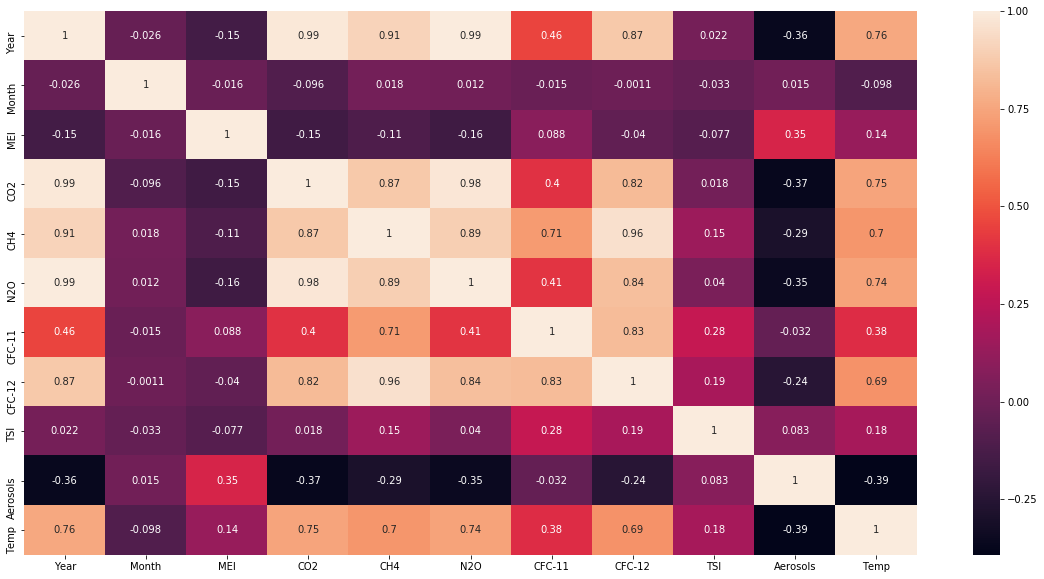

In [17]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(data.corr(),annot = True)

### 1)	Find the correlations between all the variables in the dataset except Date & Month. Which of the following independent variables is N2O highly correlated with (absolute correlation greater than 0.7)? 

##### Noticing the above graph, N20 is highly correlated with temperature with corr rate .74 and it is highly correlated with CH4 and Co@ with corr values .89 and .98 respectively

### 2)	What is Multicollinearity? Does Multicollinearity exist in this Data?

##### Multicollinearity is when there's a corelation between features in the dataset.ie the features of the dataframe is dependent on another feature or all of the features

In [18]:
##let us chck if theres a multicollinearity

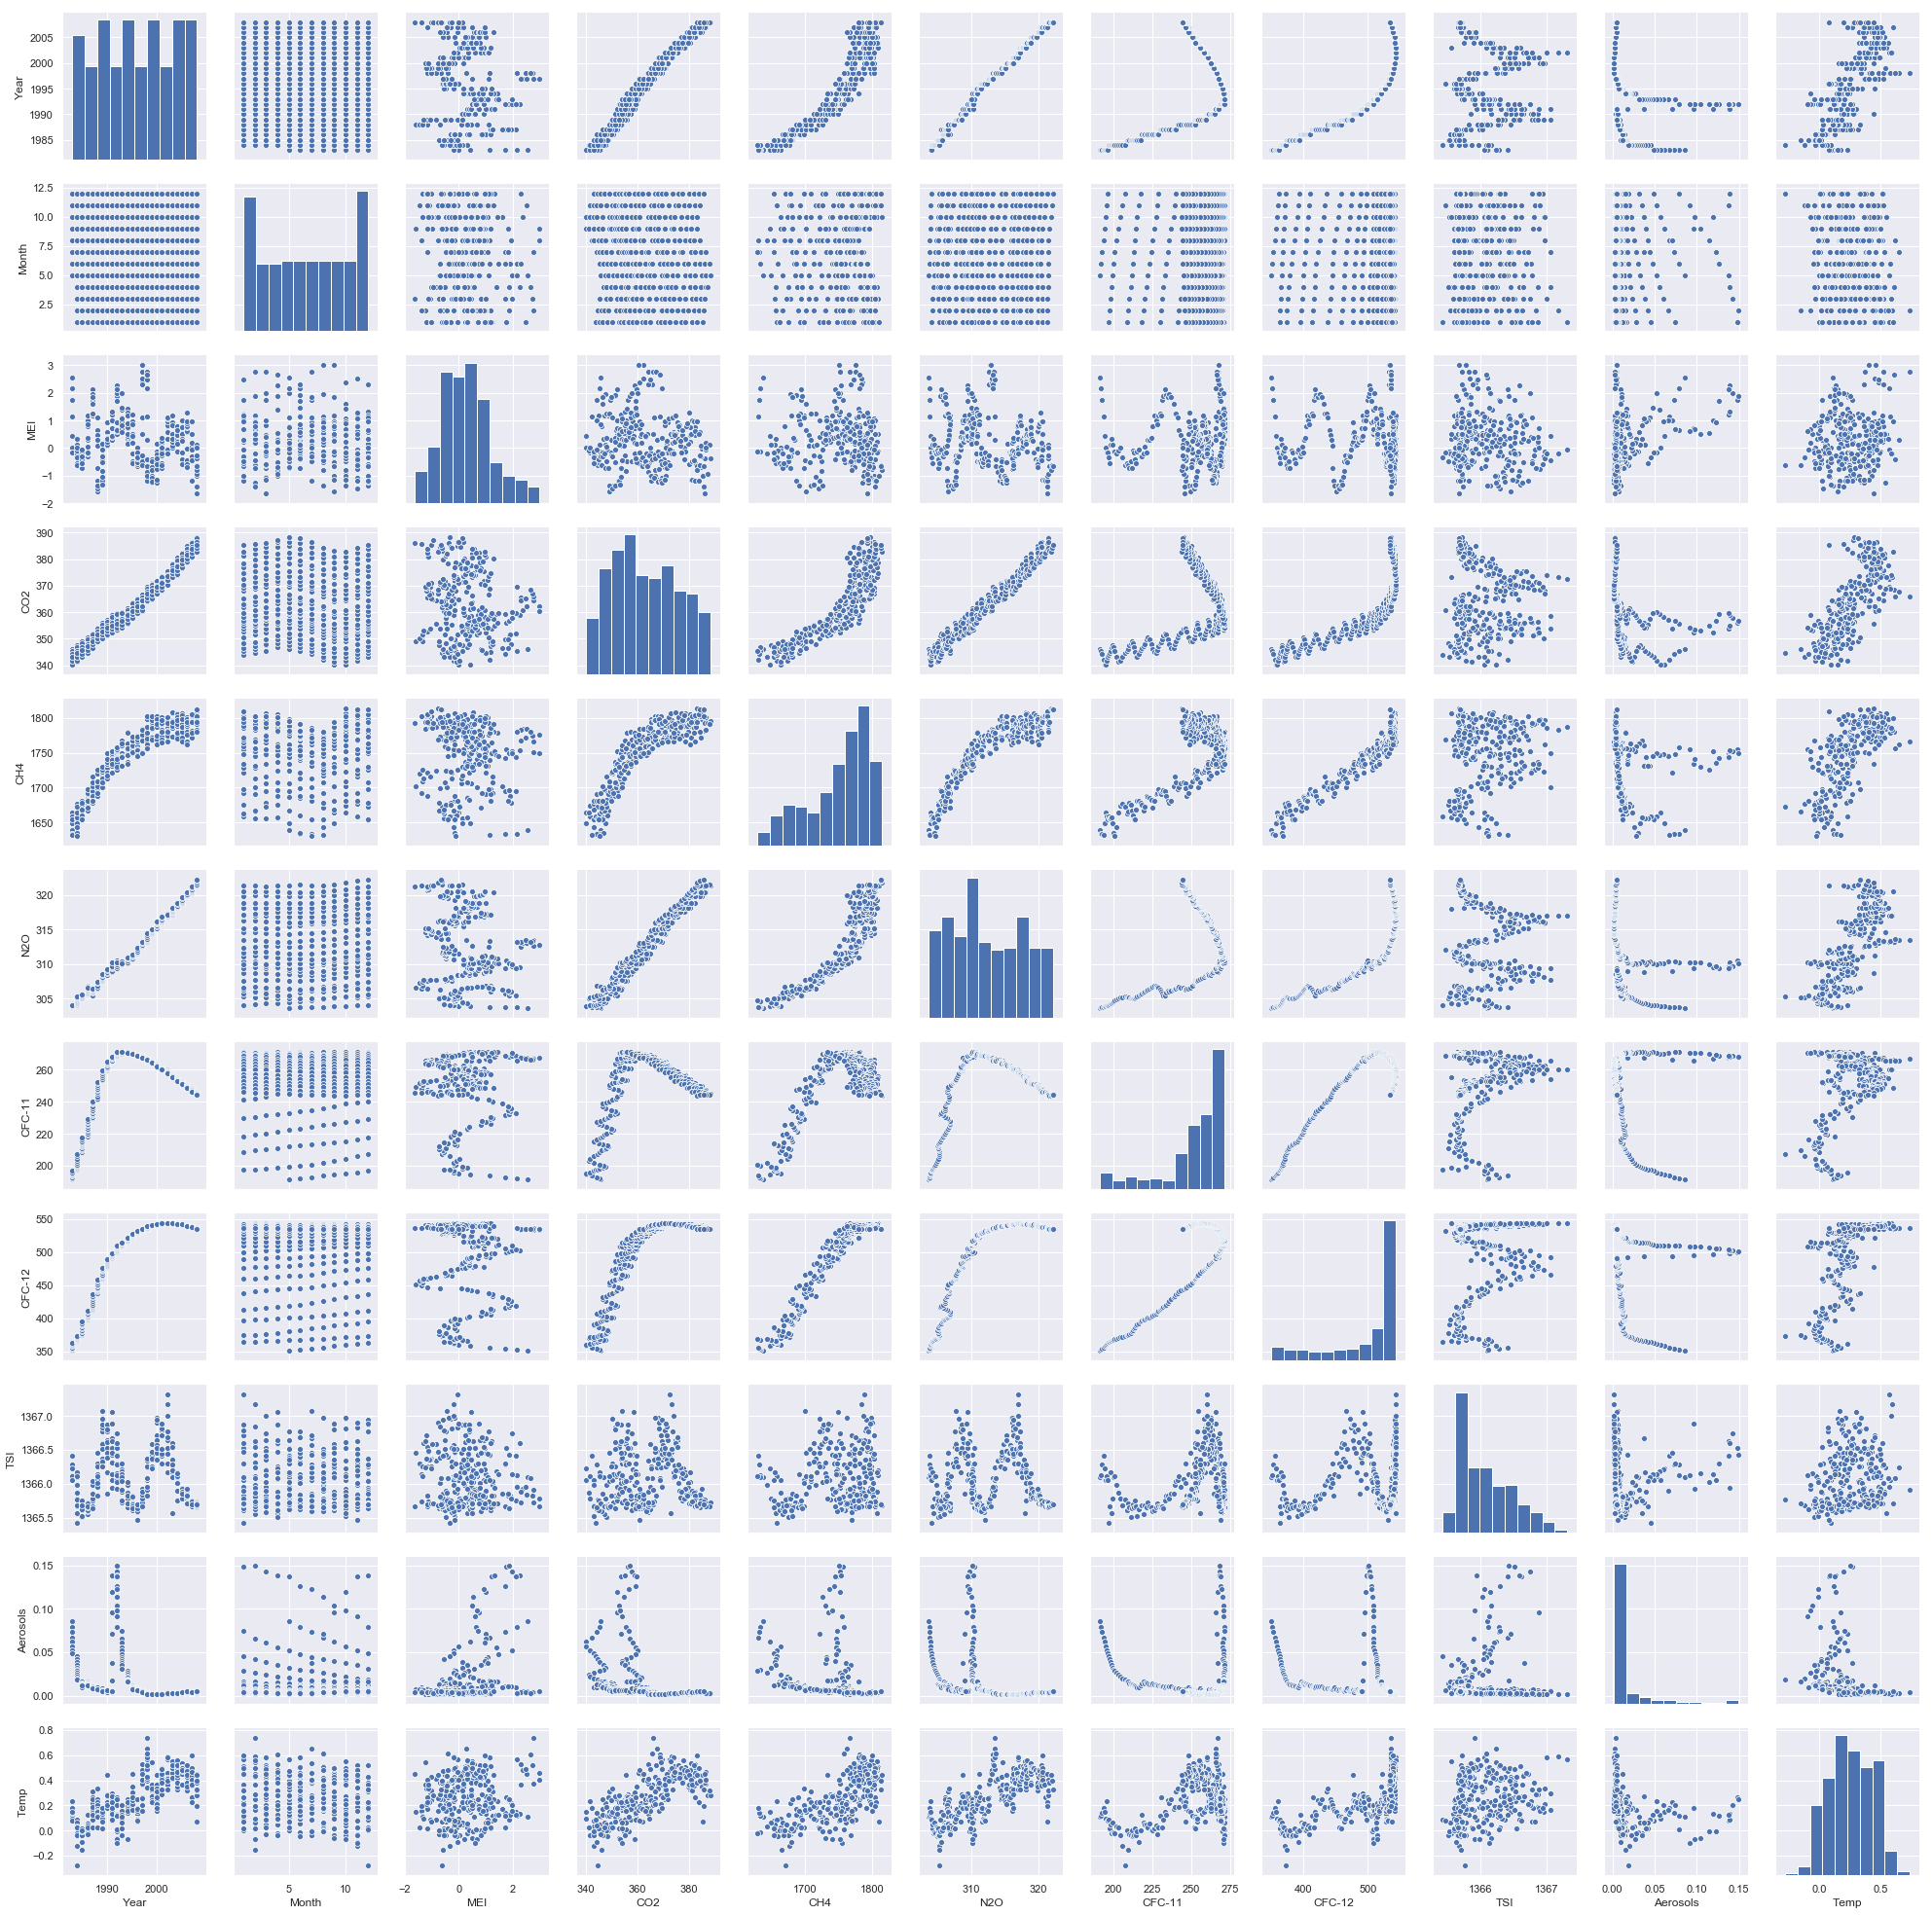

In [19]:
# let us plot pair plot for our understanding
sns.set()
sns.pairplot(data)

In [20]:
#columns
data.columns

Index(['Year', 'Month', 'MEI', 'CO2', 'CH4', 'N2O', 'CFC-11', 'CFC-12', 'TSI',
       'Aerosols', 'Temp'],
      dtype='object')

In [66]:
raw.columns=['Year','Month','MEI','CO2','CH4','N2O','CFC1','CFC2','TSI','Aerosols','Temp']
raw.head()

,Year,Month,MEI,CO2,CH4,N2O,CFC1,CFC2,TSI,Aerosols,Temp
0,1983,5,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,1983,6,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1983,7,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1983,8,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,1983,9,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


In [28]:
import statsmodels.formula.api as smf
from __future__ import print_function
from patsy import dmatrices

In [39]:
# By noticing the above pair plot we cn easily confirm tgere's a multi collinearity in the datafram.
#let us check in the statistical approach.
model1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC1 +CFC2+ TSI+Aerosols', data=raw).fit()

In [40]:
#library for vif
from statsmodels.stats.outliers_influence import variance_inflation_factor

variables = model1.model.exog

vif2 = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
vif2

[13454981.483446594,
 1.2256958636480382,
 27.99610328105384,
 19.12950758432084,
 61.03745302018466,
 31.829321263532037,
 93.49818247345468,
 1.1409763102540567,
 1.3544700995628356]

In [ ]:
#noticing on vif ,Tsi has high vif which means highly corrolated with anoth feature.Vif less then 10 are said to be correlated with
#some features.
#remove the high vif feature and repeat the same until vif<=1

### 3)	Which variables are highly correlated with the Dependent Variable? Is Co-relation god or bad for the Model? Why?

In [76]:
raw1=raw.iloc[:,2:11]

In [77]:
raw1.head()

,MEI,CO2,CH4,N2O,CFC1,CFC2,TSI,Aerosols,Temp
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863,0.109
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794,0.118
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731,0.137
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673,0.176
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619,0.149


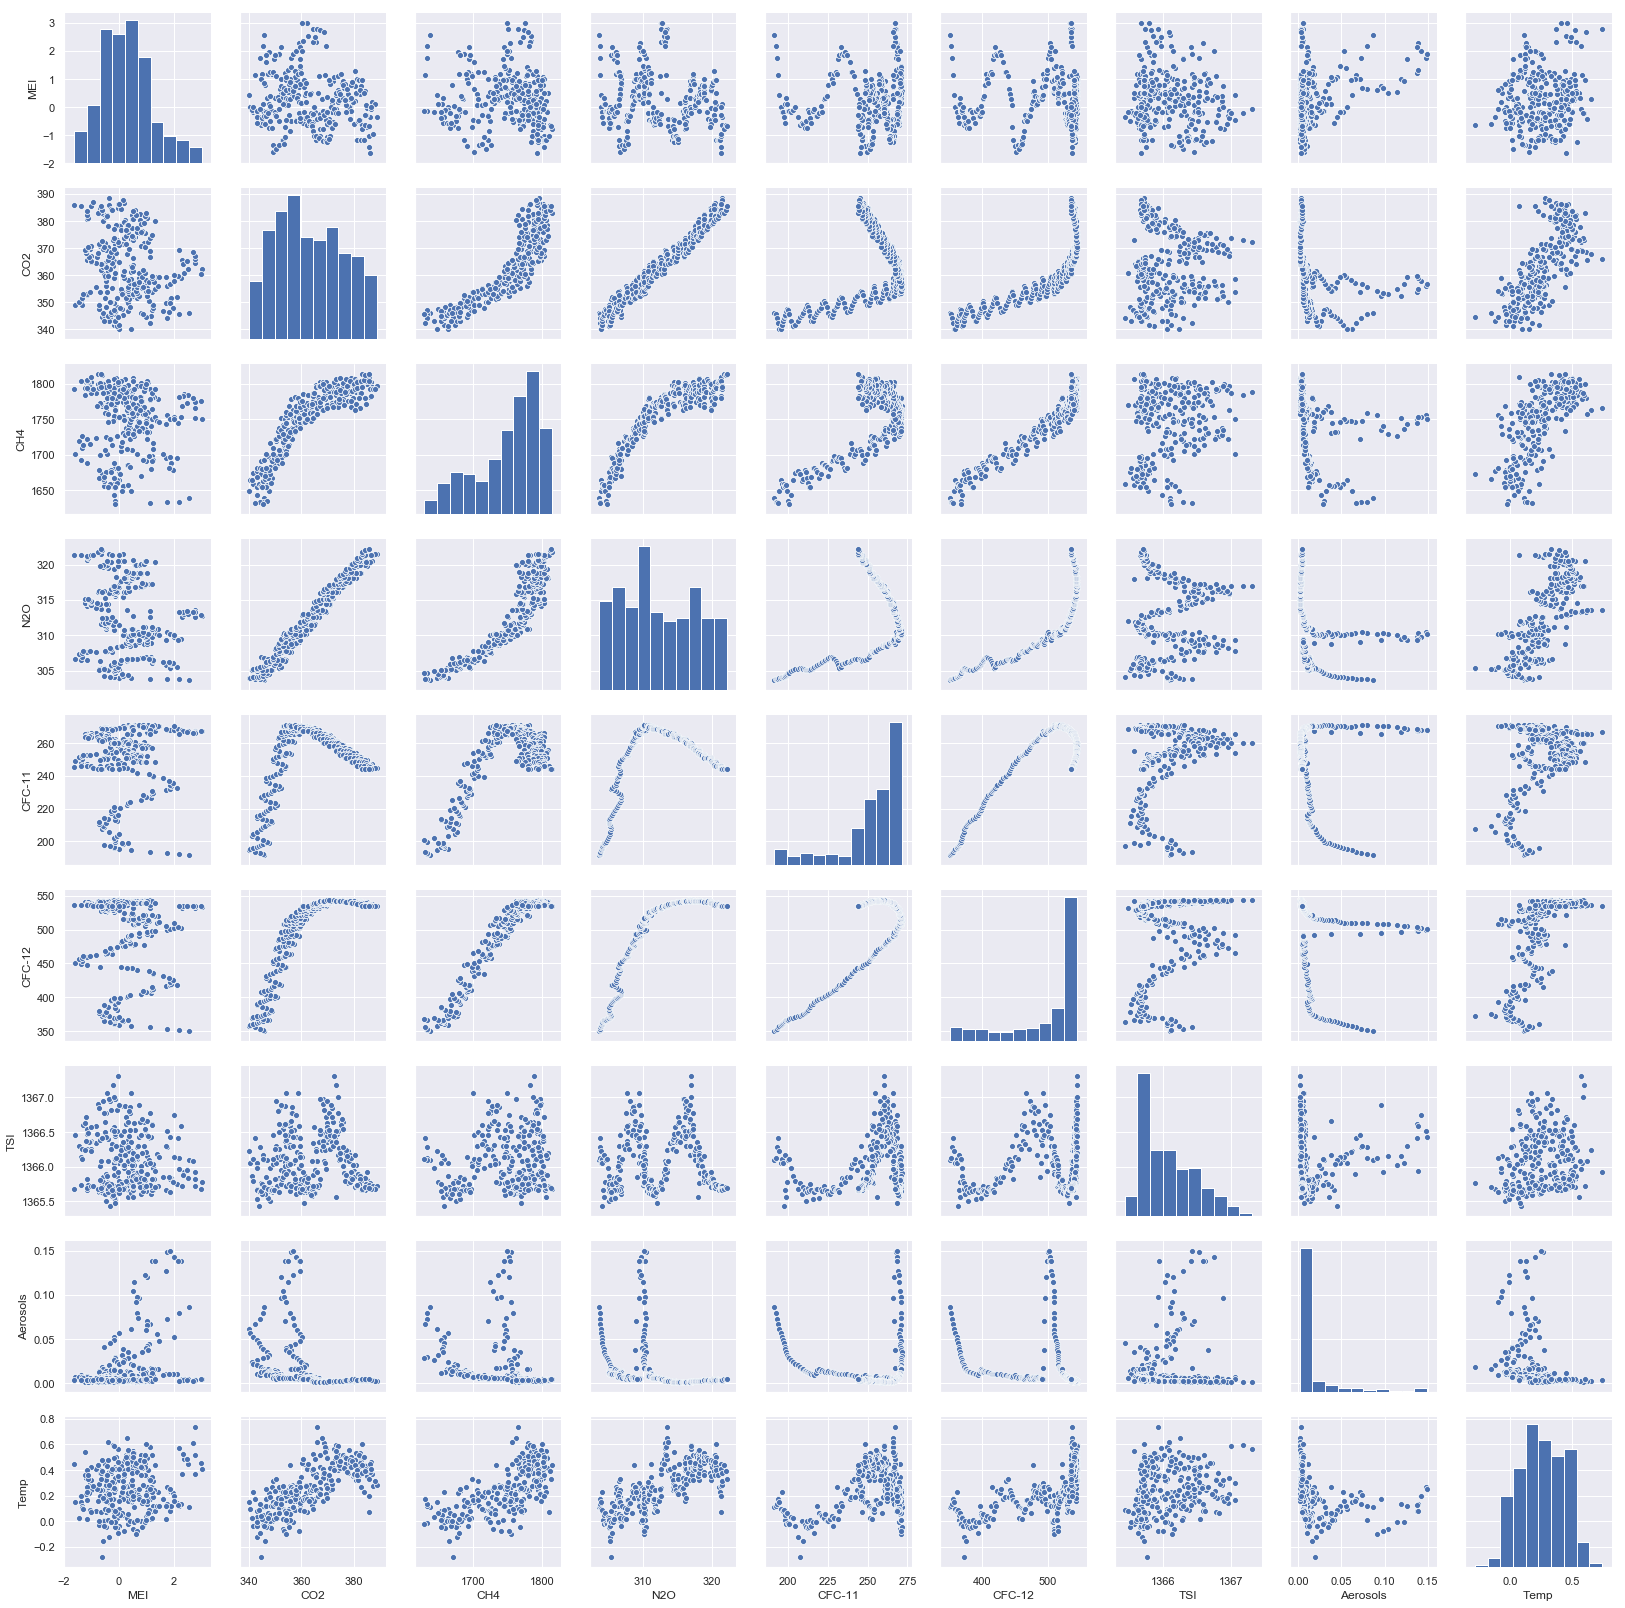

In [63]:
sns.set()
sns.pairplot(raw1)

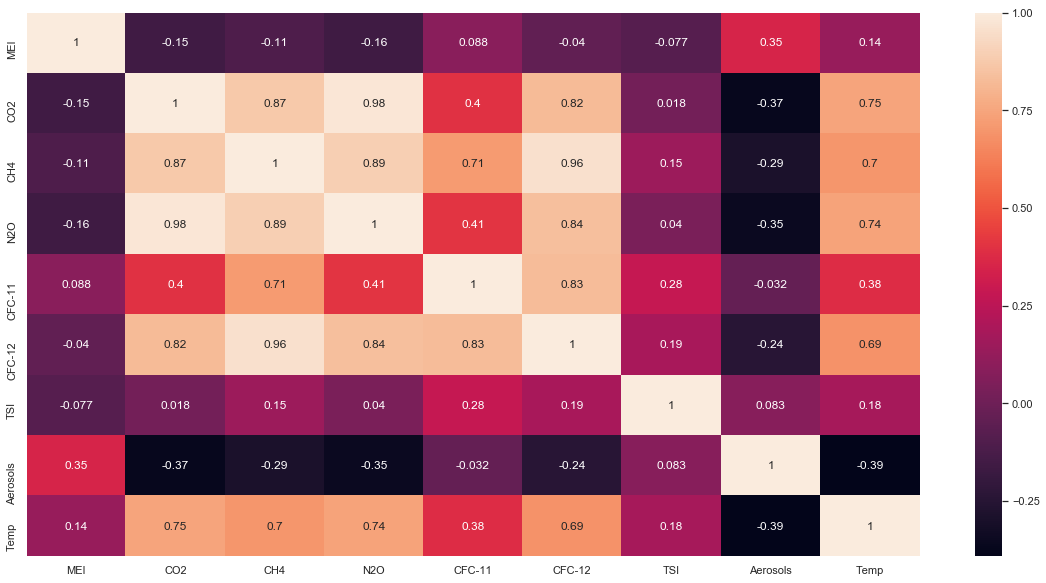

In [64]:
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(raw1.corr(),annot = True)

##### The dependent variable temp is highly dependnet on Co2 ,ch4,n20 and cfc-12 with corr value more then .69
##### Notice that temp is positevely correlated with the aove features

### 4)	What will be the prediction of a baseline Model? What will be its SSE, more commonly known as SST/TSS?

In [67]:
model1 = smf.ols('Temp ~ MEI+CO2+CH4+N2O +CFC1 +CFC2+ TSI+Aerosols', data=raw).fit()

In [68]:
print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.737
Method:                 Least Squares   F-statistic:                     108.6
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           8.21e-84
Time:                        14:49:49   Log-Likelihood:                 303.02
No. Observations:                 308   AIC:                            -588.0
Df Residuals:                     299   BIC:                            -554.5
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6958     19.191     -6.654      0.0

In [69]:
#since p value of ch4 is mor ethen 0.05 which means theres no significance dependency on respnce variable.
#popping out that feature.
model2 = smf.ols('Temp ~ MEI+CO2+N2O +CFC1 +CFC2+ TSI+Aerosols', data=raw).fit()

In [71]:
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.744
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     124.5
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           7.14e-85
Time:                        14:50:30   Log-Likelihood:                 303.01
No. Observations:                 308   AIC:                            -590.0
Df Residuals:                     300   BIC:                            -560.2
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   -127.6250     19.151     -6.664      0.0

In [78]:
raw3=raw1.iloc[:,0:8]
raw3.head()

,MEI,CO2,CH4,N2O,CFC1,CFC2,TSI,Aerosols
0,2.556,345.96,1638.59,303.677,191.324,350.113,1366.1024,0.0863
1,2.167,345.52,1633.71,303.746,192.057,351.848,1366.1208,0.0794
2,1.741,344.15,1633.22,303.795,192.818,353.725,1366.2850,0.0731
3,1.130,342.25,1631.35,303.839,193.602,355.633,1366.4202,0.0673
4,0.428,340.17,1648.40,303.901,194.392,357.465,1366.2335,0.0619


In [79]:
predvalues =  model2.predict(raw3) # predict out of sample
predvalues.head()

0    0.162886
1    0.148515
2    0.140639
3    0.114243
4    0.048742
dtype: float64

### SSE is sum of squares of errors 
#### which is the square of diff of actual vlue to the predicted value

In [81]:
#RMSE
np.mean(np.square(raw1.Temp - predvalues))

0.008184708661334179

In [82]:
#SSE
sum(np.square(raw1.Temp - predvalues))

2.5208902676909273

### 5)	Build a linear regression model to predict the dependent variable Temp, using CO2, N2O, CFC.12, and Aerosols as independent variables. Find the RMSE, SSE and MAPE for the above Model. What is the model R2 (the "Multiple R-squared" value & Adjusted R2).

In [83]:
model3 = smf.ols('Temp ~ CO2+N2O +CFC2+Aerosols', data=raw).fit()

In [84]:
print(model3.summary())

                            OLS Regression Results                            
Dep. Variable:                   Temp   R-squared:                       0.596
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     111.9
Date:                Tue, 04 Dec 2018   Prob (F-statistic):           1.81e-58
Time:                        15:02:30   Log-Likelihood:                 232.93
No. Observations:                 308   AIC:                            -455.9
Df Residuals:                     303   BIC:                            -437.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -2.9781      1.198     -2.485      0.0

In [ ]:
# R2 square is .59
#Adj r2 is .591


In [85]:
#taking subset from df
columns = ['CO2', 'N2O', 'CFC2', 'Aerosols']
sliced = pd.DataFrame(raw3, columns=columns) 
sliced.head()

,CO2,N2O,CFC2,Aerosols
0,345.96,303.677,350.113,0.0863
1,345.52,303.746,351.848,0.0794
2,344.15,303.795,353.725,0.0731
3,342.25,303.839,355.633,0.0673
4,340.17,303.901,357.465,0.0619


In [86]:
predvalues1 =  model3.predict(sliced) # predict out of sample
predvalues1.head()

0   -0.044721
1   -0.039437
2   -0.040265
3   -0.044750
4   -0.050715
dtype: float64

In [87]:
#RMSE
np.mean(np.square(raw1.Temp - predvalues1))

0.012901885489799026

In [103]:
#SSE
SSE=sum(np.square(raw1.Temp - predvalues1))
SSE

3.9737807308581

In [95]:
#MAPE
import numpy as np

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

mean_absolute_percentage_error(raw1.Temp, predvalues1)
    

159.49003764897546

### 6)	Calculate R2 value manually using the formulae for R2. Both should match.

##### R2 is 1-(SSE/SST)

In [108]:
m=raw1.Temp.mean()
SST=sum(raw1.Temp-m)
SST

4.9960036108132044e-15

In [109]:
SSE

3.9737807308581

In [205]:
R2= 1-(SSE/SST)

### 7)	Find the correlation between the actual & predicted values of Temp. Square this number and you should get the Multiple R2. This is another quick way to compute R2. ( R2= correlation(actual, predicted values)^2)

C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


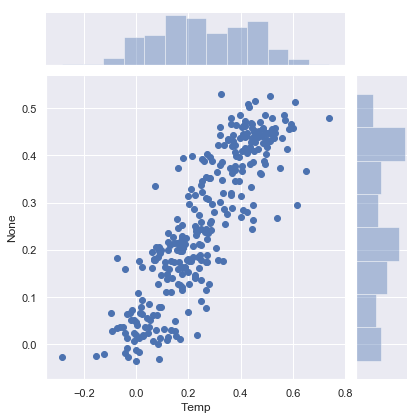

In [112]:
sns.jointplot(raw1.Temp,predvalues)

In [ ]:
#It is positevely correlated

In [114]:
c=raw1.Temp.corr(predvalues)
c

0.8625427101889532

In [117]:
r2=np.square(c)
r2

0.7439799269001046

### 8)	What is the Hypothesis test in case of a Linear Regression?

##### In logical regression ,imagine the best fit line y=b0+b1x,here hypothesis test is done in the following

#### h0: b1=0 (null hypothesis)
#### ha: b1!=0 (alternative hypothesis)
   #### then check the p values if theses any dependency
    

##### in linear regression ,all the features are assumes to null hypothsis.

### 9)	What do the P values represent? Do we look for low or High P values? Why?

##### P value is checked to reject the null hypothesis.If p values is more then .05 then we failed to reject null hypothesis
#### If P value is less then .05 then we rejct the null hypothesis.

### 10)	What is an F Test in Linear Regression? Discuss.

##### F test is done on linear regression to reject the null hypothesis.
#### Based on the F value we get ,we can find the P value since with the help of p value we can reject or fail to reject the null hypothesis

# _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _ _  _ _ _ _ _ _ _ _ _ _ _ _ __ _

# Loan dataset

## Predicting weather a customer is eligible or not for loan using logistic regression

In [119]:
#Importing df
bank=pd.read_csv("loans.csv")
bank.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [120]:
#shape
bank.shape

(9578, 14)

In [121]:
#columns
bank.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [122]:
#checking if theres any null values,#oops no null values
bank.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

In [123]:
#checking data types
bank.dtypes

credit.policy          int64
purpose               object
int.rate             float64
installment          float64
log.annual.inc       float64
dti                  float64
fico                   int64
days.with.cr.line    float64
revol.bal              int64
revol.util           float64
inq.last.6mths         int64
delinq.2yrs            int64
pub.rec                int64
not.fully.paid         int64
dtype: object

In [124]:
bank.purpose.unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

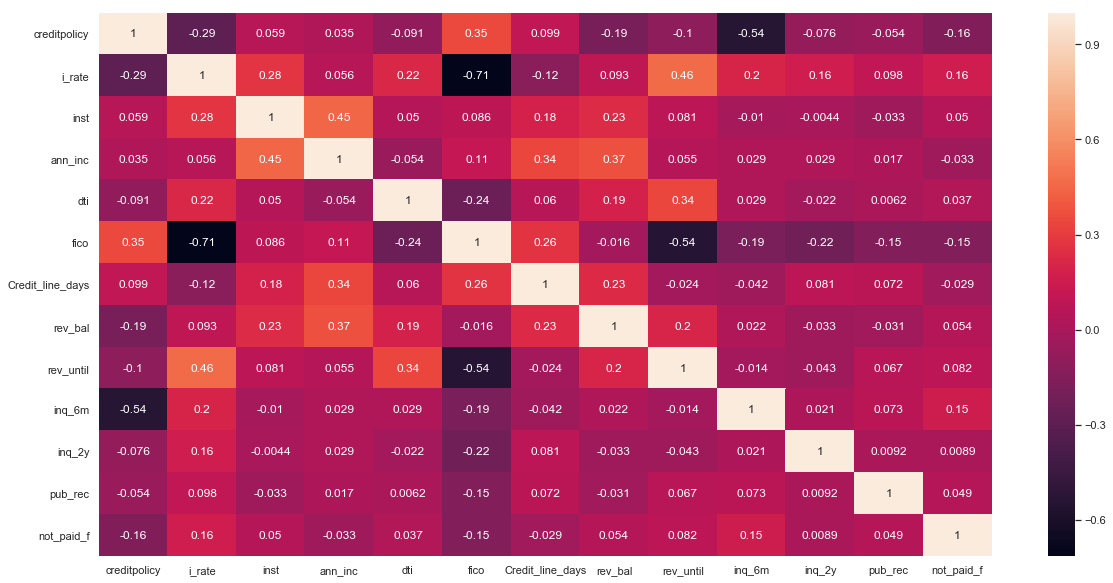

In [193]:
# Ploting correlation plot
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(bank.corr(),annot = True)

In [194]:
bank.corr()

,creditpolicy,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f
creditpolicy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119
i_rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552
inst,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955
ann_inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666
Credit_line_days,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237
rev_bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699
rev_until,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088
inq_6m,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452


In [127]:
bank["credit.policy"].unique()
# 1 is eligible, 0 is not eligible

array([1, 0], dtype=int64)

In [129]:
bank['credit.policy'].value_counts()

1    7710
0    1868
Name: credit.policy, dtype: int64

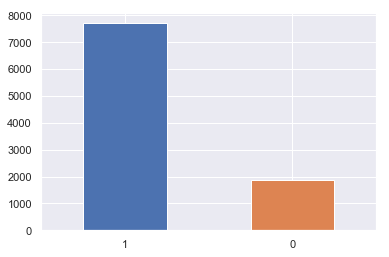

In [130]:
#bar
bank["credit.policy"].value_counts().plot(kind="bar",rot = 0)

In [ ]:
## seems like there is a class imbalance.
# we need to up sample.

### 1)	Split it into a training and testing set. How should the split be made? Why? Which function will you use to split the data?

In [132]:
# changing col names
bank.columns=['creditpolicy','purpose','i_rate','inst','ann_inc','dti','fico','Credit_line_days','rev_bal','rev_until','inq_6m','inq_2y','pub_rec','not_paid_f']
bank.head()

,creditpolicy,purpose,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [ ]:
# since theres a purpose feature which is a categorical.we neeed to convert into dummies.

In [140]:
purpose = pd.get_dummies(bank['purpose'],prefix='pur',drop_first=True)

In [141]:
bank1= pd.concat([bank,purpose],axis=1)


In [142]:
bank1.head()

,creditpolicy,purpose,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [146]:
bank2= bank1.drop(labels = "purpose", axis = 1)
bank2.head()

,creditpolicy,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


In [148]:
bank3= bank2.drop(labels = "creditpolicy", axis = 1)

In [149]:
##applying z score
from scipy.stats import zscore
z_data= bank3.apply(zscore)
z_data.head()

,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855


In [150]:
#merging target and z_data
Bank= pd.concat([z_data,bank2.creditpolicy],axis=1)


In [151]:
Bank.head()

,i_rate,inst,ann_inc,dti,fico,Credit_line_days,rev_bal,rev_until,inq_6m,inq_2y,pub_rec,not_paid_f,pur_credit_card,pur_debt_consolidation,pur_educational,pur_home_improvement,pur_major_purchase,pur_small_business,creditpolicy
0,-0.139318,2.463099,0.680388,0.998505,0.688825,0.432230,0.353732,0.182704,-0.716989,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,1
1,-0.578868,-0.438854,0.244031,0.244540,-0.101303,-0.721230,0.495018,1.030602,-0.716989,-0.299730,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,1
2,0.486484,0.230708,-0.908659,-0.141885,-0.759742,0.059770,-0.397073,-0.730683,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,1
3,-0.813544,-0.757022,0.680388,-0.654697,0.030385,-0.745277,0.496321,0.909966,-0.262470,-0.299730,-0.237003,-0.436524,-0.389558,1.191856,-0.192721,-0.265117,-0.218647,-0.262855,1
4,0.743509,-1.043992,0.597961,0.343326,-1.154806,-0.198161,-0.360663,-0.251586,-0.716989,1.531147,-0.237003,-0.436524,2.567010,-0.839028,-0.192721,-0.265117,-0.218647,-0.262855,1


In [155]:
features = Bank.iloc[:,0:18]


label = Bank["creditpolicy"]

In [154]:
## splitting the data into train and test
#features.head()

In [156]:
## function for splitting train and test from dataframe
##its from sklearn model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, label, test_size=0.2, random_state=0)

In [157]:
X_train.shape

(7662, 18)

In [158]:
X_test.shape

(1916, 18)

In [159]:
y_train.shape

(7662,)

In [160]:
y_test.shape


(1916,)

## 2)	Now, use logistic regression trained on the training set to predict the dependent variable not.fully.paid using all the independent variables.

In [163]:
#imports
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [164]:
#logistic 
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [196]:
print(model_score)


0.9008350730688935


In [195]:
print(metrics.confusion_matrix(y_test, y_predict))

[[ 240  139]
 [  51 1486]]


## 3)	Which independent variables are significant in our model? 

In [166]:
logm2 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm2.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:           creditpolicy   No. Observations:                 7662
Model:                            GLM   Df Residuals:                     7643
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1834.1
Date:                Tue, 04 Dec 2018   Deviance:                       3668.2
Time:                        16:26:29   Pearson chi2:                 1.56e+04
No. Iterations:                     7   Covariance Type:             nonrobust
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      2.6627      0.066     40.238      0.000       2.533       2.792
i_rate                    -0.0146      0.072     -0.201      0.840      -0.157       0.127
inst                       0.1592      0.058      2.731      0.006       0.045       0.273
ann_inc                    0.4484      0.055      8.097      0.000       0.340       0.557
dti                        0.0454      0.047      0.958      0.338      -0.047       0.138
fico                       1.6796      0.093     18.132      0.000       1.498       1.861
Credit_line_days           0.3304      0.055      6.056      0.000       0.223       0.437
rev_bal                   -1.4840      0.071    -20.861      0.000      -1.623      -1.345
rev_until                  0.2687      0.054      4.948      0.000       0.162       0.375
inq_6m                    -2.1490      0.066    -32.788      0.000      -2.277      -2.021
inq_2y                    -0.0644      0.037     -1.737      0.082      -0.137       0.008
pub_rec                   -0.0296      0.038     -0.776      0.437      -0.104       0.045
not_paid_f                -0.1129      0.039     -2.932      0.003      -0.188      -0.037
pur_credit_card            0.0295      0.050      0.589      0.556      -0.069       0.128
pur_debt_consolidation     0.1439      0.056      2.581      0.010       0.035       0.253
pur_educational            0.0879      0.043      2.047      0.041       0.004       0.172
pur_home_improvement       0.0893      0.050      1.796      0.072      -0.008       0.187
pur_major_purchase         0.0842      0.051      1.667      0.096      -0.015       0.183
pur_small_business         0.0881      0.049      1.784      0.074      -0.009       0.185
==========================================================================================
"""

##### for the values p less then .05 then there's a significance dependency on responce

In [ ]:
#intrest rate,debt_to income,pub_rec,purpose crdit has no significance dependemcy on responce target.

### 4)	What is the concept of Dummy variables in Logistic Regression? How would you interpret a Categorical IV in Logistic Regression? What is Logit and Why is it used?

##### particularly in regression analysis, a dummy variable is one that takes the value 0 or 1 to
##### indicate the absence or presence of some categorical effect that may be expected.
##### A dummy variable can thus be thought of as a truth value represented as a numerical value 0 or 1 

In [ ]:
## regression analysis gives less accuracy when mapping is used.regression algorithms works very well with dummies.


In [ ]:
# if we have a category feature of 4 unique values,it creates the 4 new columns of categories for which 1 and 0 are assigned.
#if that row id belongs to that category ,then that feature is assgned with 1 and remaining with 0.
#since one of the feature is dropped out because if three of the categories is 0,it autometicaly resembles that 4th category is 1.

#### logit function is a probabulity of odds of sucess.
#### the range of logit function is -infinity to + infinity.
#### logit(p)= log(p/(1-p) is a logit function.
#### the range of p is (0,1)
#### as the p is tending to 1 , then logit funtions tends to + infinity and viceversa
#### it is a sigmoid function
#### in linear equation wehave
#### y=b0+b1x    
#### in logistic regression y should range from 0 to 1
#### so instead of y ,logit(y) is placed which is log(y/(1-y)

### 5) Predict the probability of the test set loans not being paid back in full. 

In [186]:
#we have confusion matrix
print(metrics.confusion_matrix(y_predict, y_test))

[[ 240   51]
 [ 139 1486]]


In [179]:
y_predict = model.predict(X_test)

In [180]:
#True Positives (TP): we correctly predicted that they do

#True Negatives (TN): we correctly predicted that they don't 

#False Positives (FP): we incorrectly predicted that they do
#Falsely predict positive Type I error


#False Negatives (FN): we incorrectly predicted that they don't
#Falsely predict negative Type II error

### What is the accuracy of the logistic regression model? Input the accuracy as a number between 0 and 1.

In [198]:
#logistic 
model = LogisticRegression()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)
model_score = model.score(X_test, y_test)
print(model_score)
#great, high accuracy even without upsampling,great work by me.

0.9008350730688935


C:\Users\sreekar chidurala\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


### 7) What is the Sensitivity, Specificity and Precision of a classification Model? Which one are used and when?

In [182]:
#we have confusion matrix
print(metrics.confusion_matrix(y_test, y_predict))

[[ 240  139]
 [  51 1486]]


In [185]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.82      0.63      0.72       379
           1       0.91      0.97      0.94      1537

   micro avg       0.90      0.90      0.90      1916
   macro avg       0.87      0.80      0.83      1916
weighted avg       0.90      0.90      0.90      1916



In [200]:
#  precision= tp / (tp + fp)
240/(240+51)

0.8247422680412371

In [187]:
#sensitivity, recall true positive rate= (TPR) tp/(tp+fn)
240/(240+139)

0.633245382585752

In [188]:
#specificity, selectivity or true negative rate (TNR)=tn(tn+fp)
1480/(1480+51)

0.9666884389288047

## ROC curve

In [190]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

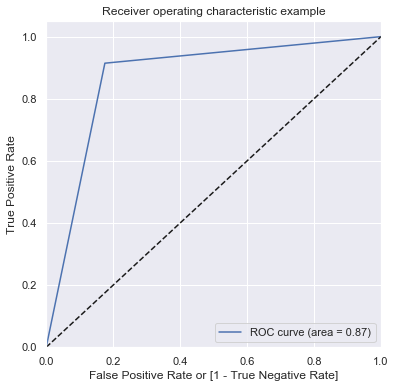

(array([0.        , 0.17525773, 1.        ]),
 array([0.        , 0.91446154, 1.        ]),
 array([2, 1, 0], dtype=int64))

In [191]:
draw_roc(y_predict, y_test)

## ROC curve is the plot between true positive rate and false positive rate.

In [ ]:
## it gives insights of at what rate the true positive is changing with respect to false positve rate.
## of a model having better accuracy the roc curve gives the elbow model